# Assignment1

### Run some setup code for this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the raw CIFAR-10 data.

In [97]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Visualize some examples from the dataset

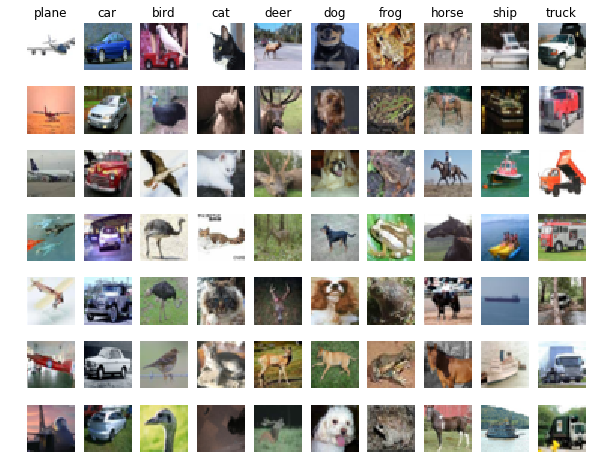

In [98]:
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Subsample the data for more efficient code execution

In [99]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

### Generate the hog message for our data

In [78]:
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import data, exposure

X_train_hog = np.array([hog(rgb2gray(image), orientations=8, pixels_per_cell=(16, 16),
                   cells_per_block=(1, 1)) for image in X_train])
X_test_hog = np.array([hog(rgb2gray(image), orientations=8, pixels_per_cell=(16, 16),
                   cells_per_block=(1, 1)) for image in X_test])

/Users/miracle/anaconda2/envs/py3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


### Generate the lbp image for our data

In [116]:
from skimage.feature import local_binary_pattern
X_train_lbp = np.reshape(np.array([local_binary_pattern(rgb2gray(image),P=1,R=2) for image in X_train]), (X_train.shape[0], -1))
X_test_lbp = np.reshape(np.array([local_binary_pattern(rgb2gray(image),P=1,R=2) for image in X_test]),  (X_test.shape[0], -1))

### Reshape the image data into rows

In [79]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


## KNN Method

In [68]:
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knn.fit(X_train, y_train)
print('KNN where n=5: ',knn.score(X_test,y_test))

KNN where n=5:  0.278


In [81]:
knn_hog = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knn_hog.fit(X_train_hog, y_train)
print('KNN where n=5 and input are hogs: ',knn_hog.score(X_test_hog,y_test))

KNN where n=5 and input are hogs:  0.322


In [117]:
knn_lbp = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knn_lbp.fit(X_train_lbp, y_train)
print('KNN where n=5 and input are lbps: ',knn_lbp.score(X_test_lbp, y_test))

KNN where n=5 and input are lbps:  0.192


## LogisticRegression

In [85]:
from sklearn.linear_model import LogisticRegression
lgr1 = LogisticRegression(C=50. / X_train.shape[0],
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
lgr1.fit(X_train, y_train)
score = lgr1.score(X_test, y_test)
print("Logistic regression score with L1 penalty: %.4f" % score)

lgr2 = LogisticRegression(C=50. / X_train.shape[0],
                         multi_class='multinomial',
                         penalty='l2', solver='saga', tol=0.1)
lgr2.fit(X_train, y_train)
score = lgr2.score(X_test, y_test)
print("Logistic regression score with L2 penalty: %.4f" % score)

Logistic regression score with L1 penalty: 0.3400
Logistic regression score with L2 penalty: 0.3320


In [86]:
lgr1 = LogisticRegression(C=50. / X_train_hog.shape[0],
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
lgr1.fit(X_train_hog, y_train)
score = lgr1.score(X_test_hog, y_test)
print("Logistic regression score with L1 penalty: %.4f" % score)

lgr2 = LogisticRegression(C=50. / X_train_hog.shape[0],
                         multi_class='multinomial',
                         penalty='l2', solver='saga', tol=0.1)
lgr2.fit(X_train_hog, y_train)
score = lgr2.score(X_test_hog, y_test)
print("Logistic regression score with L2 penalty: %.4f" % score)

Logistic regression score with L1 penalty: 0.1080
Logistic regression score with L2 penalty: 0.2520


In [120]:
lgr1 = LogisticRegression(C=50. / X_train_lbp.shape[0],
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
lgr1.fit(X_train_lbp, y_train)
score = lgr1.score(X_test_lbp, y_test)
print("Logistic regression score with L1 penalty: %.4f" % score)

lgr2 = LogisticRegression(C=50. / X_train_lbp.shape[0],
                         multi_class='multinomial',
                         penalty='l2', solver='saga', tol=0.1)
lgr2.fit(X_train_lbp, y_train)
score = lgr2.score(X_test_lbp, y_test)
print("Logistic regression score with L2 penalty: %.4f" % score)

Logistic regression score with L1 penalty: 0.1140
Logistic regression score with L2 penalty: 0.1760


## SVM Method

In [30]:
from sklearn import svm
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train, y_train) for clf in models)
for svmclf,title in zip(models,titles):
    print(title,': ',svmclf.score(X_test,y_test))

SVC with linear kernel :  0.28
LinearSVC (linear kernel) :  0.178
SVC with RBF kernel :  0.114
SVC with polynomial (degree 3) kernel :  0.356


In [83]:
C = 1.0  # SVM regularization parameter
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train_hog, y_train) for clf in models)
for svmclf,title in zip(models,titles):
    print(title,': ',svmclf.score(X_test_hog,y_test))

SVC with linear kernel :  0.33
LinearSVC (linear kernel) :  0.31
SVC with RBF kernel :  0.384
SVC with polynomial (degree 3) kernel :  0.114


In [121]:
C = 1.0  # SVM regularization parameter
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train_lbp, y_train) for clf in models)
for svmclf,title in zip(models,titles):
    print(title,': ',svmclf.score(X_test_lbp, y_test))

SVC with linear kernel :  0.144
LinearSVC (linear kernel) :  0.13
SVC with RBF kernel :  0.114
SVC with polynomial (degree 3) kernel :  0.132


# Extra Part

### Hog Image

/Users/miracle/anaconda2/envs/py3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


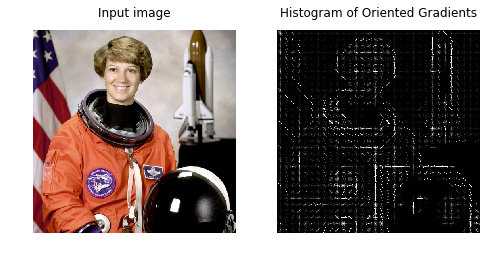

In [56]:
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import data, exposure

image = data.astronaut()

fd, hog_image = hog(image[:,:,2], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### LBP Image

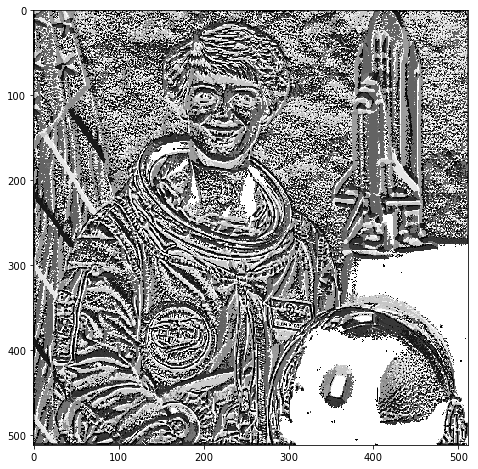

In [118]:
from skimage.feature import local_binary_pattern
image = data.astronaut()
plt.imshow(local_binary_pattern(rgb2gray(image),P=5,R=2))